<a href="https://colab.research.google.com/github/Meena-27/HunarIntern/blob/main/house_pricing_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("/content/sample_data/house price data.csv")

In [3]:
df.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
6,2014-05-02 00:00:00,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
7,2014-05-02 00:00:00,482000.0,4.0,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA
8,2014-05-02 00:00:00,452500.0,3.0,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA
9,2014-05-02 00:00:00,640000.0,4.0,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA


In [4]:
df.tail(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.000000,3.0,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [6]:

df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
print(f"Dataset shape after removing duplicates and nulls: {df.shape}")


Dataset shape after removing duplicates and nulls: (4600, 18)


In [8]:
X = df.drop('price', axis=1)  # Features
y = df['price']  # Target variable


In [9]:
from sklearn.model_selection import train_test_split

# Assuming X and y have been defined as described earlier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shapes to confirm the split
print(f"Training feature set shape: {X_train.shape}")
print(f"Testing feature set shape: {X_test.shape}")
print(f"Training target set shape: {y_train.shape}")
print(f"Testing target set shape: {y_test.shape}")


Training feature set shape: (3680, 17)
Testing feature set shape: (920, 17)
Training target set shape: (3680,)
Testing target set shape: (920,)


In [10]:
from sklearn.linear_model import LinearRegression


In [11]:
model = LinearRegression()


In [16]:
print(df.dtypes)
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].astype(int) / 10**9

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object


In [17]:
df = pd.get_dummies(df, drop_first=True)  # This will convert categorical columns into dummy/indicator variables


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)  # This should now work without errors


LinearRegression()

In [21]:
y_pred = model.predict(X_test)


In [23]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)


In [25]:
 from sklearn.metrics import r2_score
 r2 = r2_score(y_test, y_pred)


In [26]:
# Print the results
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2) Score: {r2}')


Mean Squared Error (MSE): 4611178743864.897
R-squared (R2) Score: -3.521444616324982


In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the results
print(f'Mean Squared Error (MSE) - Random Forest: {mse_rf}')
print(f'R-squared (R2) Score - Random Forest: {r2_rf}')


Mean Squared Error (MSE) - Random Forest: 969280029200.3884
R-squared (R2) Score - Random Forest: 0.04958228401570253


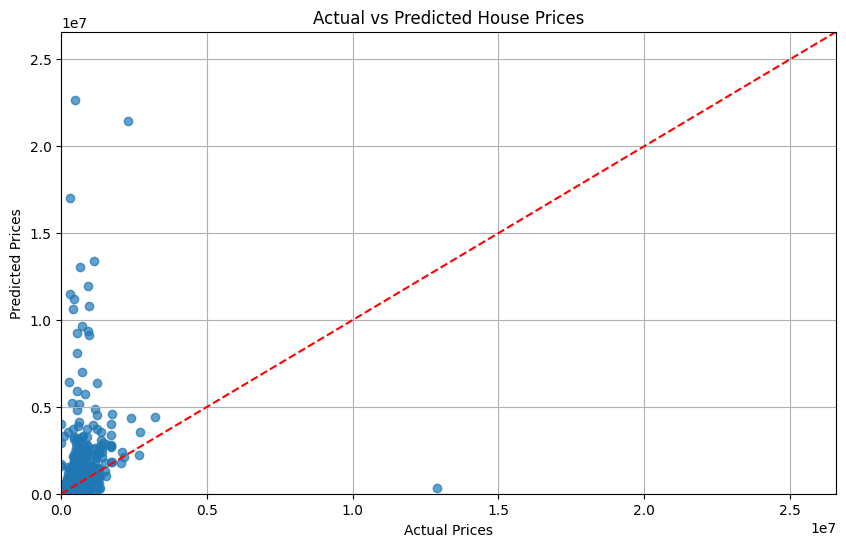

            Actual     Predicted
3683  5.440000e+05  1.202159e+05
4411  0.000000e+00 -2.694244e+05
2584  1.712500e+06  3.360204e+06
69    3.650000e+05 -3.990706e+03
1844  2.750000e+05 -5.308146e+05
33    6.250000e+05  1.307745e+06
3085  4.530000e+05 -2.247510e+05
4034  3.000000e+05  2.301416e+05
4469  4.179857e+05  7.354633e+05
4578  6.725000e+05  8.785232e+05


In [28]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.grid()
plt.show()

# Step 4: Check for Accuracy
# Analyze some predictions
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head(10))  # Display the first 10 actual vs pre